In [83]:
import torch 
import numpy as np

### Tensor

In [9]:
# In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.
# Tensors are similar to `NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators.

data = [[1,2],[3,4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [11]:
np_array = np.array(data)
x_data = torch.from_numpy(np_array)
x_data

tensor([[1, 2],
        [3, 4]])

In [21]:
x_ones = torch.ones_like(x_data)
x_rand = torch.rand_like(x_data , dtype=torch.float64)
x_rand

tensor([[0.7533, 0.3094],
        [0.2310, 0.3094]], dtype=torch.float64)

In [32]:
x_ones = torch.ones(3,1)
x_rand = torch.rand(5,3,2,3)
print(x_rand)
x_rand[1,2,1,2]

tensor([[[[0.4308, 0.4583, 0.0020],
          [0.7809, 0.9550, 0.7036]],

         [[0.1881, 0.8999, 0.7811],
          [0.5968, 0.0361, 0.6606]],

         [[0.9149, 0.1656, 0.6879],
          [0.6670, 0.7032, 0.4162]]],


        [[[0.1609, 0.9064, 0.5558],
          [0.2800, 0.4500, 0.5383]],

         [[0.5052, 0.5498, 0.8268],
          [0.3768, 0.9929, 0.9279]],

         [[0.9640, 0.4804, 0.5276],
          [0.9710, 0.1408, 0.3867]]],


        [[[0.4833, 0.1848, 0.3177],
          [0.7666, 0.9663, 0.0848]],

         [[0.3801, 0.3806, 0.3627],
          [0.6640, 0.6235, 0.4516]],

         [[0.1052, 0.3028, 0.4623],
          [0.8728, 0.1126, 0.9782]]],


        [[[0.4205, 0.1875, 0.0330],
          [0.3530, 0.4844, 0.8037]],

         [[0.7662, 0.8408, 0.2799],
          [0.5974, 0.2019, 0.8354]],

         [[0.3541, 0.5874, 0.7328],
          [0.7049, 0.8538, 0.0168]]],


        [[[0.6526, 0.9462, 0.0018],
          [0.7675, 0.6744, 0.3273]],

         [[0.5482, 0.0234, 0.9

tensor(0.3867)

In [46]:
tensor = torch.ones(4, 4)*np.random.randint(0,high =5,size=4)
tensor

tensor([[4., 0., 4., 2.],
        [4., 0., 4., 2.],
        [4., 0., 4., 2.],
        [4., 0., 4., 2.]], dtype=torch.float64)

In [62]:
y1 = torch.rand(5,5)
y2 = torch.rand(5,5)
y3 = y1@ y2
y3

tensor([[0.4676, 1.2691, 0.6872, 0.5498, 1.5075],
        [0.7371, 1.2569, 1.0446, 0.6841, 1.6469],
        [0.4610, 1.6522, 0.5755, 0.9011, 1.4095],
        [0.5882, 1.2278, 0.8867, 0.6425, 1.3892],
        [0.4092, 1.0743, 0.5042, 0.6829, 0.8991]])

In [78]:
z1 = torch.rand(5,5)
for i in z1.sum(1):
    print(f"items {i.item()}")


items 1.0352287292480469
items 2.627589464187622
items 3.501321315765381
items 2.003802537918091
items 2.112405300140381


In [75]:
z1.add_(5)

tensor([[5.0557, 5.7914, 5.8175, 5.9093],
        [5.3173, 5.4479, 5.7413, 5.3117],
        [5.2566, 5.1487, 5.3617, 5.9336],
        [5.6248, 5.1730, 5.8764, 5.8024],
        [5.9981, 5.6067, 5.5669, 5.1576]])

In [79]:
z1.copy_(y3)
z1

tensor([[0.4676, 1.2691, 0.6872, 0.5498, 1.5075],
        [0.7371, 1.2569, 1.0446, 0.6841, 1.6469],
        [0.4610, 1.6522, 0.5755, 0.9011, 1.4095],
        [0.5882, 1.2278, 0.8867, 0.6425, 1.3892],
        [0.4092, 1.0743, 0.5042, 0.6829, 0.8991]])

In [82]:
# Important : bridge-to-np-label, # Tensors on the CPU and NumPy arrays can share their underlying memory
# locations, and changing one will change	the other.

t= torch.ones(5)
nump = t.numpy()
print(f"data : {nump.sum().item()}")
t.add_(5)
print(f"data : {nump.sum().item()}")

data : 5.0
data : 30.0


### Dataloader

In [97]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import os
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import DataLoader

In [87]:
 training_data = datasets.FashionMNIST(
     root = "data",
     train = True,
     download = True,
     transform = ToTensor()
     
 )
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



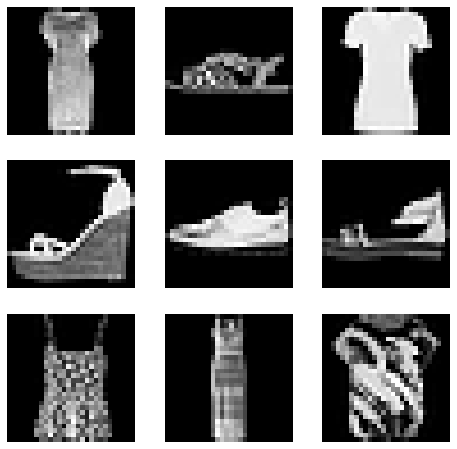

In [95]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8,8))
cols,rows =3,3
for i in range(1,cols*rows+1):
    sample_idx = torch.randint(len(training_data),size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows,cols,i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()  

In [99]:
## custom dataset class 
class customDatasetClass(Dataset):
    def __init__(self, annotation_file, img_dir, transform=None, target_transform=None):
        self.image_labels = pd.read_csv(annotation_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = tarfet_transform
    
    def __len__():
        return len(self.image_labels)
    
    def __getitem__():
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label


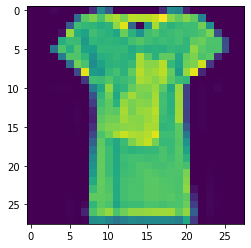

In [103]:
# iterate
train_dataloader = DataLoader(training_data,batch_size=64, shuffle = True)
test_dataloader = DataLoader(test_data,batch_size=64, shuffle = True)

imgs, labels = next(iter(train_dataloader))
plt.imshow(imgs[0].squeeze())